<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_R/blob/main/Colab_Notebook/02_07_03_06_survival_analysis_gompertz_model_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![All-test](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 3.6 Gompertz Survival Model


The Gompertz survival model is less commonly used but is particularly effective for modeling scenarios where the hazard rate increases exponentially over time. This makes it suitable for applications such as modeling mortality rates in aging populations or disease progression where risk accumulates rapidly.



## Overview


The **Gompertz survival model** is a parametric model used in survival analysis to model time-to-event data, particularly when the hazard rate increases exponentially over time. It is widely used in fields like actuarial science, demography, and medical research (e.g., modeling mortality or disease progression) due to its ability to capture increasing hazard rates, such as those associated with aging or disease progression. The Gompertz model is part of the Accelerated Failure Time (AFT) framework in some implementations, but it is more commonly parameterized in terms of its hazard function, especially in R’s `flexsurv` package.


### Key Features


- **Hazard Function**: The Gompertz model assumes an exponentially increasing hazard rate, \( h(t) = \lambda e^{\gamma t} \), where the hazard grows rapidly over time, making it suitable for processes like aging where risk accumulates.
- **Applications**: Used in mortality studies (e.g., human or animal lifespans), cancer progression, and reliability engineering for systems with increasing failure rates.
- **Assumptions**: Assumes the hazard increases exponentially, driven by the shape parameter \( \gamma \). The model is less flexible than the generalized gamma but simpler than models with non-monotonic hazards (e.g., log-normal, log-logistic).
- **Advantages**: Simple parameterization, captures increasing hazards well, and has closed-form expressions for survival and hazard functions.
- **Limitations**: Cannot model decreasing or non-monotonic hazards (use log-normal or generalized gamma instead). May not fit data with complex hazard shapes.


The Gompertz distribution is defined by two parameters:

- $\lambda > 0$: Scale parameter, representing the baseline hazard at $t = 0$.
- $\gamma > 0$: Shape parameter, controlling the rate of hazard increase (for $\gamma = 0$, it reduces to the exponential model).

- **Hazard Function**:

$$
  h(t) = \lambda e^{\gamma t}, \quad t > 0
$$
  The hazard increases exponentially with time, reflecting accelerating risk.

- **Cumulative Hazard Function**:

$$
  H(t) = \int_0^t h(u) \, du = \int_0^t \lambda e^{\gamma u} \, du = \frac{\lambda}{\gamma} (e^{\gamma t} - 1)
$$
- **Survival Function**:

$$
  S(t) = e^{-H(t)} = \exp\left( -\frac{\lambda}{\gamma} (e^{\gamma t} - 1) \right)
$$
- **Probability Density Function (PDF)**:
$$
  f(t) = h(t) S(t) = \lambda e^{\gamma t} \exp\left( -\frac{\lambda}{\gamma} (e^{\gamma t} - 1) \right)
$$

- **Mean**: The mean survival time is complex and involves integrals not expressible in closed form, but it can be computed numerically.


### When to Use


Choose the Gompertz model when:
- Nonparametric hazard estimates (e.g., from Kaplan-Meier or kernel smoothing) show a monotonically increasing hazard.
- The data reflects processes like aging or disease progression where risk grows over time.
- You need a model with a simple, interpretable hazard function and closed-form survival probabilities.


### Model Fit Assessment


- Use AIC/BIC to compare with other models (e.g., Weibull, log-normal).
- Check residuals (e.g., Cox-Snell) or compare fitted survival curves to Kaplan-Meier estimates.
- Validate the increasing hazard assumption with hazard plots or log-cumulative hazard plots.


## Setup R in Python Runtype - Install {rpy2}
{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp312-cp312-linux_x86_64.whl size=316566 sha256=8cad4458d15d0b13a6d0175c869bfe6c7bf7d88aa6daab1d2038d07e0311eb90
  Stored in directory: /root/.cache/pip/wheels/00/26/d5/d5e8c0b039915e785be870270e4a9263e5058168a03513d8cc
Successfully built rpy2


## Mount Google Drive

In [2]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Implementation in R


This tutorial demonstrates fitting a Gompertz survival model using R’s `flexsurv` package, as the `survival` package’s `survreg` does not directly support the Gompertz distribution. We’ll use the `lung` dataset from `survival`, consistent with your previous queries. The code includes data preparation, model fitting, predictions, plotting, and diagnostics, incorporating lessons from prior errors (e.g., `Invalid status value`, empty `lung_clean`, `psurvreg`, `lines`, and plotting issues).


### Install Required R Packages


Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:


In [3]:
%%R
packages <-c(
		 'tidyverse',
		 'survival',
		 'flexsurv',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condSURV',
		 'riskRegression'
		 )



```


### Install missing packages

In [ ]:
%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')
devtools::install_github("ItziarI/WeDiBaDis", lib='drive/My Drive/R/')

### Verify installation

In [4]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method        from 
  nobs.multinom broom



     tidyverse       survival       flexsurv      survminer      ggsurvfit 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    tidycmprsk      ggfortify        timereg         cmprsk       condSURV 
          TRUE           TRUE           TRUE           TRUE           TRUE 
riskRegression 
          TRUE 


### Load Packages

In [5]:
%%R
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
     tidyverse       survival       flexsurv      survminer      ggsurvfit 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    tidycmprsk      ggfortify        timereg         cmprsk       condSURV 
          TRUE           TRUE           TRUE           TRUE           TRUE 
riskRegression 
          TRUE 


In [6]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])

Successfully loaded packages:
[1] "package:tools"     "package:stats"     "package:graphics" 
[4] "package:grDevices" "package:utils"     "package:datasets" 
[7] "package:methods"   "package:base"     


### Data Preparation

In [8]:
%%R
library(survival)
library(flexsurv)  # For Gompertz model
library(ggplot2)   # For hazard plotting

# Load and prepare lung dataset
data(lung)
# Recode status: 1=censored (0), 2=dead (1)
lung$status <- lung$status - 1

# Data cleaning
lung_clean <- lung[!is.na(lung$time) & !is.na(lung$status) &
                   !is.na(lung$age) & !is.na(lung$sex) &
                   lung$time > 0 & lung$status %in% c(0, 1), ]
# Verify data to avoid empty dataset
if (nrow(lung_clean) == 0) stop("lung_clean is empty; check filtering conditions")
print("Status values after recoding:")
table(lung_clean$status, useNA = "always")
print("Any non-positive times?")
any(lung_clean$time <= 0)
print("Summary of cleaned data:")
summary(lung_clean[, c("time", "status", "age", "sex")])

# Center age to improve numerical stability
lung_clean$age_centered <- lung_clean$age - mean(lung_clean$age)

# Create survival object
surv_object <- Surv(time = lung_clean$time, event = lung_clean$status)

[1] "Status values after recoding:"
[1] "Any non-positive times?"
[1] "Summary of cleaned data:"


### Fit Gompertz Model

In [9]:
%%R
# Fit Gompertz models
gompertz_model <- flexsurvreg(surv_object ~ 1, data = lung_clean, dist = "gompertz")
gompertz_model_cov <- tryCatch(
  flexsurvreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "gompertz"),
  error = function(e) {
    message("Convergence failed, trying with initial estimates")
    flexsurvreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "gompertz",
                inits = c(0.001, 0.01, 0, 0))  # Initial: shape (gamma), rate (lambda), coefficients
  }
)
print("Model summary (with covariates):")
summary(gompertz_model_cov)

[1] "Model summary (with covariates):"
age_centered=1.49587944370547e-15,sex=1.39473684210526 
    time        est        lcl        ucl
1      5 0.99175781 0.98944260 0.99363423
2     11 0.98188171 0.97686334 0.98597089
3     12 0.98023729 0.97477630 0.98469111
4     13 0.97859333 0.97269198 0.98341061
5     15 0.97530683 0.96853150 0.98084746
6     26 0.95726589 0.94584316 0.96669964
7     30 0.95072081 0.93767442 0.96153428
8     31 0.94908586 0.93563904 0.96024126
9     53 0.91325924 0.89154861 0.93163018
10    54 0.91163757 0.88957578 0.93032244
11    59 0.90353864 0.87975239 0.92377479
12    60 0.90192076 0.87779587 0.92246349
13    61 0.90030353 0.87584207 0.92115161
14    62 0.89868695 0.87389098 0.91983915
15    65 0.89384114 0.86804705 0.91589823
16    71 0.88416755 0.85642496 0.90796928
17    79 0.87130804 0.84107618 0.89732273
18    81 0.86810027 0.83726531 0.89465320
19    88 0.85689609 0.82401023 0.88528573
20    92 0.85051015 0.81649386 0.87991640
21    93 0.84891558 0.8

### Predictions and Survival Estimates

In [10]:
%%R
# Prediction for new data (60-year-old male)
new_data <- data.frame(age_centered = 60 - mean(lung_clean$age), sex = 1)
median_time <- predict(gompertz_model_cov, newdata = new_data, type = "survival")[[1]]
print("Median survival time (days):")
print(median_time)

# Survival probability at t=500 days
surv_prob <- summary(gompertz_model_cov, newdata = new_data, type = "survival", t = 500)$est
print("Survival probability at t=500 days:")
print(surv_prob)

[1] "Median survival time (days):"
[[1]]
# A tibble: 228 × 2
   .eval_time .pred_survival
        <dbl>          <dbl>
 1          5          0.990
 2         11          0.979
 3         11          0.979
 4         11          0.979
 5         12          0.977
 6         13          0.975
 7         13          0.975
 8         15          0.971
 9         26          0.950
10         30          0.943
# ℹ 218 more rows
# ℹ Use `print(n = ...)` to see more rows

[1] "Survival probability at t=500 days:"
NULL


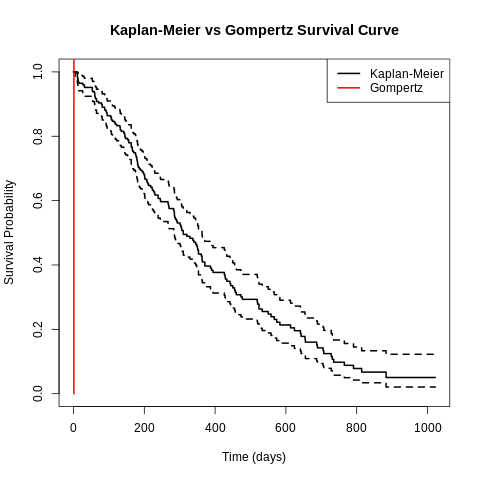

In [11]:
%%R
# Plot Kaplan-Meier and Gompertz curve (null model)
km_fit <- survfit(surv_object ~ 1)
plot(km_fit, main = "Kaplan-Meier vs Gompertz Survival Curve",
     xlab = "Time (days)", ylab = "Survival Probability",
     col = "black", lwd = 2)
t_seq <- seq(0, max(lung_clean$time), length.out = 100)
surv_gompertz <- summary(gompertz_model, t = t_seq, type = "survival")$est
lines(t_seq, surv_gompertz, col = "red", lwd = 2)
legend("topright", c("Kaplan-Meier", "Gompertz"), col = c("black", "red"), lwd = 2)

### Model Diagnostics

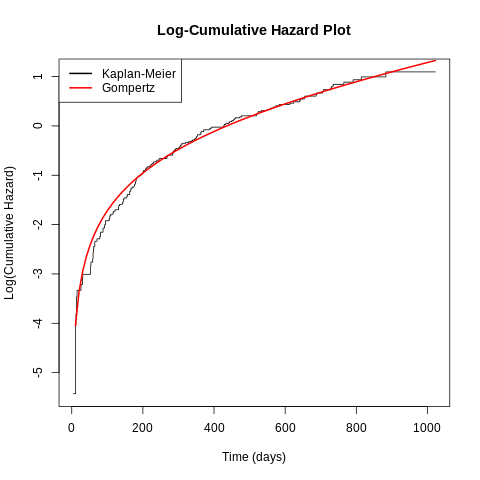

In [12]:
%%R
# 1. Log-Cumulative Hazard Plot (Check increasing hazard)
km_cumhaz <- -log(km_fit$surv)
valid <- is.finite(km_cumhaz) & km_fit$surv > 0  # Exclude Inf/zero
if (sum(valid) > 0) {
  plot(km_fit$time[valid], log(km_cumhaz[valid]), type = "s",
       main = "Log-Cumulative Hazard Plot",
       xlab = "Time (days)", ylab = "Log(Cumulative Hazard)")
  # Theoretical Gompertz: log(H(t)) = log(lambda/gamma * (exp(gamma*t) - 1))
  lambda <- exp(gompertz_model$coefficients["rate"])
  gamma <- gompertz_model$coefficients["shape"]
  lines(t_seq, log(lambda/gamma * (exp(gamma * t_seq) - 1)), col = "red", lwd = 2)
  legend("topleft", c("Kaplan-Meier", "Gompertz"), col = c("black", "red"), lwd = 2)
} else {
  warning("No valid data for log-cumulative hazard plot. Using cumulative hazard.")
  plot(km_fit$time[km_fit$surv > 0], km_cumhaz[km_fit$surv > 0], type = "s",
       main = "Cumulative Hazard Plot (Fallback)",
       xlab = "Time (days)", ylab = "Cumulative Hazard")
  lines(t_seq, lambda/gamma * (exp(gamma * t_seq) - 1), col = "red", lwd = 2)
}

[1] "AIC Comparison:"
                   df      AIC
gompertz_model_cov  4 2305.807
weibull_model_cov   4 2302.109
lnorm_model_cov     4 2325.500


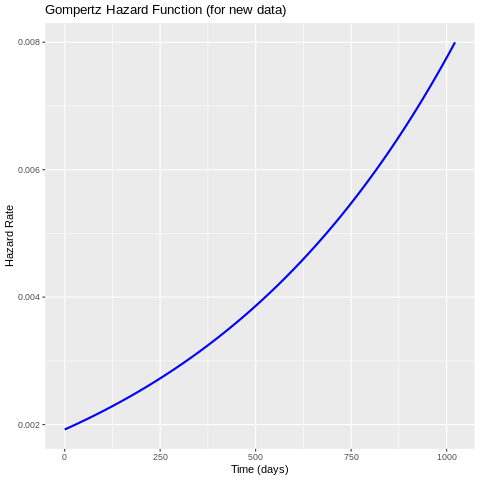

In [13]:
%%R
# 3. Goodness-of-Fit: Compare with Weibull and Log-Normal
weibull_model_cov <- flexsurvreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "weibull")
lnorm_model_cov <- flexsurvreg(surv_object ~ age_centered + sex, data = lung_clean, dist = "lnorm")
print("AIC Comparison:")
print(AIC(gompertz_model_cov, weibull_model_cov, lnorm_model_cov))

# 4. Hazard Plot (for new_data)
haz_gompertz <- summary(gompertz_model_cov, newdata = new_data, type = "hazard", t = t_seq, tidy = TRUE)
ggplot(haz_gompertz, aes(x = time, y = est)) +
  geom_line(col = "blue", lwd = 1) +
  ggtitle("Gompertz Hazard Function (for new data)") +
  xlab("Time (days)") + ylab("Hazard Rate")

## Summary and Conclusion


The Gompertz survival model is a powerful tool for modeling time-to-event data with exponentially increasing hazard rates. It is particularly useful in contexts such as aging populations and disease progression, where risk accumulates rapidly over time. By leveraging the `flexsurv` package in R, we can effectively fit Gompertz models, make predictions, and assess model fit through various diagnostic plots.
When applying the Gompertz model, it is crucial to ensure that the data meets the model's assumptions, particularly the increasing hazard rate. Model diagnostics, including log-cumulative hazard plots and Cox-Snell residuals, help validate these assumptions and assess the model's adequacy.


## Resources


- **R Documentation**:
  - `survreg`: [https://rdrr.io/r/stats/survreg.html](https://rdrr.io/r/stats/survreg.html)
  - `flexsurvreg`: [https://cran.r-project.org/web/packages/flexsurv/flexsurv.pdf](https://cran.r-project.org/web/packages/flexsurv/flexsurv.pdf)
- **Books**:
  - "Survival Analysis: Techniques for Censored and Truncated Data" by Klein & Moeschberger
  - "Applied Survival Analysis" by Hosmer, Lemeshow, & May
- **Tutorials**:
  - UCLA IDRE Survival Analysis with R: [https://stats.idre.ucla.edu/r/seminars/survival-analysis-with-r/](https://stats.idre.ucla.edu/r/seminars/survival-analysis-with-r/)
  - R-bloggers: [https://www.r-bloggers.com/](https://www.r-bloggers.com/)
- **Online Courses**:
  - Coursera: "Survival Analysis in R" by Duke University
  - edX: "Survival Analysis" by Harvard University



In [ ]:
%%R
# remove all objects from the environment
rm(list = ls())